### 데이터 및 라이브러리 import ###
- 용접 가압력, 전류, 전압, 통전시간을 값을 토대로 용접의 결과 (Label)를 확인
- 용접의 결과는 OKAY, PROBLEM으로 성공 여부 확인 가능
- 불필요한 컬럼 (unnamed:0 )이 확인되어, 삭제 필요

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import platform 

# 데이터 확인
data = pd.read_csv("./example_data.csv")
display (data)

,Unnamed: 0,용접 가압력,전류,전압,통전시간,Label
0,0,0.004482,0.001717,0.002506,0.000461,PROBLEM
1,1,0.005412,0.000501,0.002506,0.000922,OKAY
2,2,0.004989,0.000358,0.507830,0.000922,PROBLEM
3,3,0.005243,0.000358,0.002506,0.000922,PROBLEM
4,4,0.005327,0.000143,0.002506,0.000461,PROBLEM
...,...,...,...,...,...,...
11934,11934,0.005158,0.000715,0.002401,0.000461,OKAY
11935,11935,0.003721,0.000930,0.002506,0.000922,PROBLEM
11936,11936,0.004651,0.001645,0.002610,0.000922,OKAY
11937,11937,0.005074,0.268136,0.002610,0.000922,OKAY


### 결측값 유무 확인 ###
- 정답에 해당되는 컬럼은 문제가 없으나 입력에 사용되는 컬럼에 결측값 존재
- 결측값은 평균값 또는 임의이 값으로 채워서 확인
- 결측값을 채우는 방법에 따라 상관관계가 달라질수 있는데, 이에 대한 결과 생각해보기
- 또는 결측값을 제거한 것과 비교하여, 성능의 차이를 확인해 보는 것도 좋은 방향

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11939 entries, 0 to 11938
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  11939 non-null  int64  
 1   용접 가압력      11921 non-null  float64
 2   전류          11924 non-null  float64
 3   전압          11924 non-null  float64
 4   통전시간        11916 non-null  float64
 5   Label       11939 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 559.8+ KB


In [104]:
# 결측값 확인
print("Before:", data.isnull().sum())
print("")
# 결측값 채우기 (여기서는 하나의 컬럼 단위로 진행하고 확인)
data["용접 가압력"]=data["용접 가압력"].fillna(data["용접 가압력"].mean())

# 결측값이 잘 채워졌는지 확인
print("After :", data.isnull().sum())

Before: Unnamed: 0     0
용접 가압력        18
전류            15
전압            15
통전시간          23
Label          0
dtype: int64

After : Unnamed: 0     0
용접 가압력         0
전류            15
전압            15
통전시간          23
Label          0
dtype: int64


### 데이터 변환 및 컬럼 정리###
- 문자열 데이터는 바로 상관관계 분석을 할 수 없음
- 라벨 인코더 또는 Map 함수를 사용하여 변환
- 불필요한 컬럼이 포함되어 해당 컬럼 삭제

In [105]:
# Map 함수를 사용하는 경우
data["Label"]=data.Label.map({"OKAY": 1, "PROBLEM": 0})
data.drop(["Unnamed: 0"], axis=1, inplace=True)

In [106]:
display(data)

,용접 가압력,전류,전압,통전시간,Label
0,0.004482,0.001717,0.002506,0.000461,0
1,0.005412,0.000501,0.002506,0.000922,1
2,0.004989,0.000358,0.507830,0.000922,0
3,0.005243,0.000358,0.002506,0.000922,0
4,0.005327,0.000143,0.002506,0.000461,0
...,...,...,...,...,...
11934,0.005158,0.000715,0.002401,0.000461,1
11935,0.003721,0.000930,0.002506,0.000922,0
11936,0.004651,0.001645,0.002610,0.000922,1
11937,0.005074,0.268136,0.002610,0.000922,1


### 상관관계 확인 및 그래프 그리기 ###
- 결측값을 제거한 상태에서의 상관관계는 약 0.006에 해당
- 상관관계를 높이기 위해서 필요한 전처리 기법은 어떤것이 있을까 ?
- 데이터 자체를 정규분포, 이상치가 없는 데이터로 만들어 정확도 개선 가능!

In [112]:
data.corr()

,용접 가압력,전류,전압,통전시간,Label
용접 가압력,1.000000,0.001892,0.007367,0.001597,0.006217
전류,0.001892,1.000000,-0.001762,-0.003658,0.025618
전압,0.007367,-0.001762,1.000000,0.024107,-0.005537
통전시간,0.001597,-0.003658,0.024107,1.000000,0.009367
Label,0.006217,0.025618,-0.005537,0.009367,1.000000


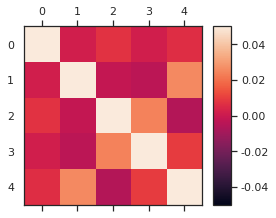

In [114]:
plt.matshow(data.corr())
plt.colorbar(shrink=0.8, aspect=10)
plt.clim(-0.05, 0.05)
plt.show()